In [1]:
#import face_recognition as fr
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
import glob
import numpy as np
import re
import pandas as pd
import cv2
face_cascade = cv2.CascadeClassifier('gui_2/assets/haarcascade_frontalface_default.xml')
HEIGHT, WIDTH =48,48

In [2]:
paths = ["data/all/train/","data/all/test/"] #["data/CK+/","data/fer/train/"]
# data  = listdir(path)
ignore = ["morralla",".DS_Store","contempt"]
imgs = []
state = []

In [111]:
# for path in paths:
#     for item in listdir(path):
#         if item not in ignore:
#             imgs.extend([f"{path}{item}/{p}" for p in listdir(f"{path}{item}")])
#             state.extend([item for p in listdir(f"{path}{item}")])

In [113]:
len(imgs),len(state)

(50964, 50964)

In [120]:
# cats = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
# dif_collections= []
# for emotion in cats:
#     dic = {"x":[],"y":[]}
#     for i in range(len(state)):
#         if state[i] == emotion:
#             dic["x"].append(imgs[i])
#             dic["y"].append(emotion)
#     dif_collections.append(dic)
            

In [125]:
len(dif_collections[0]["x"]),len(dif_collections[0]["y"])

(5305, 5305)

In [3]:
for path in paths:
    for item in listdir(path):
        if item not in ignore:
            imgs.extend([{"path": f"{path}{item}/{p}", "emotion": item}for p in listdir(f"{path}{item}")])

In [4]:
imgs_ = []
state = []
for p in imgs:
    temp = cv2.imread(p["path"],0)
    faces = face_cascade.detectMultiScale(temp, 1.1, 5)
    if len(faces)==1:
        for (x,y,w,h) in faces:
            recortada = temp[y:y+h, x:x+w]
            recortada = cv2.resize(recortada,(HEIGHT, WIDTH))
            imgs_.append(recortada)
            state.append(p["emotion"])
    
        
imgs_ = [el/255 for el in imgs_]
imgs_array = np.array(imgs_)


In [5]:
imgs_array.shape

(22087, 48, 48)

In [5]:
# errs = []
# try:
#     imgs_ = []
#     for p in imgs:
#         temp = Image.open(p)
#         save = temp.copy()
#         imgs_.append(save)
#         temp.close()
# except:
#     errs.append(p)

In [6]:
# imgs_array = []
# HEIGHT, WIDTH =48,48
# for f in imgs_:
#     img = f.convert("L").resize((HEIGHT, WIDTH))
#     imgs_array.append(np.array(img))

In [7]:
# imgs_array = [el/255 for el in imgs_array]
# imgs_array = np.array(imgs_array)

In [6]:
imgs_array= imgs_array.reshape((len(imgs_array),48,48,1))

In [7]:
imgs_array.shape

(22087, 48, 48, 1)

In [8]:
state

['surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',

In [291]:
y=pd.DataFrame(state)
y_dummies = pd.get_dummies(y)

In [292]:
y_dummies

,0_anger,0_disgust,0_fear,0_happiness,0_neutral,0_sadness,0_surprise
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
22147,0,0,0,0,0,1,0
22148,0,0,0,0,0,1,0
22149,0,0,0,0,0,1,0
22150,0,0,0,0,0,1,0


In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs_array,y_dummies)

In [9]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization,Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from tensorflow.keras.optimizers import Adam, Nadam, SGD, Adamax
import keras

In [10]:
# opt = Adam(learning_rate=0.001)

In [11]:
model = Sequential()
# 1-conv
model.add(Conv2D(64,(3,3),padding='same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2-conv
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()


2021-11-16 10:12:55.495982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 10:12:55.500440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 10:12:55.500812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 10:12:55.501621: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [297]:
from keras.models import Sequential, load_model, model_from_json
from keras import callbacks, optimizers
import tensorflow as tf
from datetime import date

fecha=str(date.today().year)+str(date.today().month)+str(date.today().day)    
symbol = 'alldata'
h5 = symbol + '_2_' + fecha + '_v4.h5'
checkpoint = callbacks.ModelCheckpoint(h5,
                                       monitor='loss',
                                       verbose=0,
                                       save_best_only=True,
                                       #save_weights_only=True,
                                       mode='auto',
                                       save_freq=1)
callback = [checkpoint]
json = symbol + '_best_model' + fecha + '.json'
model_json = model.to_json()
with open(json, "w") as json_file:
    json_file.write(model_json)

modelo = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 5000,callbacks = callback,validation_split = 0.1)

Epoch 1/5000
468/468 [==============================] - 164s 349ms/step - loss: 1.3120 - accuracy: 0.5623 - val_loss: 1.7550 - val_accuracy: 0.5523
Epoch 2/5000
468/468 [==============================] - 7s 15ms/step - loss: 1.0201 - accuracy: 0.6705 - val_loss: 0.8999 - val_accuracy: 0.7034
Epoch 3/5000
468/468 [==============================] - 6s 12ms/step - loss: 0.8980 - accuracy: 0.7010 - val_loss: 0.9983 - val_accuracy: 0.6781
Epoch 4/5000
468/468 [==============================] - 5s 11ms/step - loss: 0.8206 - accuracy: 0.7225 - val_loss: 0.9735 - val_accuracy: 0.7136
Epoch 5/5000
468/468 [==============================] - 6s 13ms/step - loss: 0.7671 - accuracy: 0.7389 - val_loss: 0.8901 - val_accuracy: 0.7262
Epoch 6/5000
468/468 [==============================] - 5s 11ms/step - loss: 0.7236 - accuracy: 0.7483 - val_loss: 0.7286 - val_accuracy: 0.7635
Epoch 7/5000
468/468 [==============================] - 6s 13ms/step - loss: 0.6974 - accuracy: 0.7574 - val_loss: 0.7686 - val

KeyboardInterrupt: 

In [12]:
from sklearn.multiclass import OneVsRestClassifier
X =  imgs_array.copy()
y = state.copy()
clf = OneVsRestClassifier(model).fit(X, y)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7f3d6b69cfd0>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [93]:
paths = ["data/predict/"]
# data_pred  = listdir(path)
ignore = ["morralla",".DS_Store","contempt"]
imgs_pred = []
state_pred = []
im_pred = {}

In [94]:
for path in paths:
    for item in listdir(path):
        if item not in ignore:
            imgs_pred.extend([{"path": f"{path}{item}/{p}", "emotion": item}for p in listdir(f"{path}{item}")])
            #state_pred.extend([item for p in listdir(f"{path}{item}")])



In [95]:
len(imgs_pred)

73

In [96]:
from keras.models import load_model

In [97]:
model = load_model('alldata_2_20211115.h5')

In [98]:
len(state_pred)

0

In [99]:
imgs_pred_ = []
state_pred = []
for p in imgs_pred:
    temp = cv2.imread(p["path"],0)
    faces = face_cascade.detectMultiScale(temp, 1.1, 5)
    if len(faces)>0:
        for (x,y,w,h) in faces:
            recortada = temp[y:y+h, x:x+w]
            recortada = cv2.resize(recortada,(HEIGHT, WIDTH))
            imgs_pred_.append(recortada)
            state_pred.append(p["emotion"])
    
        
imgs_pred_ = [el/255 for el in imgs_pred_]
imgs_pred_ = np.array(imgs_pred_)
imgs_pred_= imgs_pred_.reshape((len(imgs_pred_),48,48,1))

In [100]:
len(imgs_pred_)

80

In [101]:
len(state_pred)

80

In [102]:
prediction = model.predict(imgs_pred_)

In [103]:
state_pred

['surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness']

In [104]:
prediction[:5]

array([[8.4894957e-05, 3.7728207e-09, 6.8917363e-03, 2.5523326e-08,
        5.1553252e-07, 1.6033631e-07, 9.9302262e-01],
       [1.0018654e-08, 1.5192790e-12, 1.0942463e-05, 9.6037495e-01,
        4.1263547e-07, 5.1037152e-12, 3.9613694e-02],
       [4.5495493e-05, 5.8931235e-08, 2.1744058e-02, 4.6597645e-01,
        1.6718764e-02, 2.0592222e-04, 4.9530926e-01],
       [2.2900608e-08, 2.4792980e-12, 1.6108788e-07, 6.3151351e-10,
        8.7809113e-08, 4.0679465e-12, 9.9999964e-01],
       [1.9551955e-07, 1.1681860e-10, 8.5411684e-06, 9.5126493e-09,
        2.8508299e-07, 1.5838350e-11, 9.9999106e-01]], dtype=float32)

In [105]:
prediction.argmax(axis = -1)


array([6, 3, 6, 6, 6, 6, 4, 6, 6, 0, 6, 6, 6, 6, 4, 0, 1, 3, 0, 5, 4, 1,
       1, 1, 1, 4, 1, 4, 2, 4, 1, 1, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4,
       3, 4, 5, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 0, 1, 0,
       1, 0, 4, 2, 6, 6, 6, 4, 5, 5, 4, 5, 5, 4])

In [106]:
cats= y_dummies.columns
cats = [x.replace("0_","") for x in cats]

NameError: name 'y_dummies' is not defined

In [107]:
cats = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [108]:
len(prediction)

80

In [109]:
states_model = []
i=0
for i in range(len(prediction)):
    states_model.append(cats[prediction[i].argmax()])
    print(state_pred[i],cats[prediction[i].argmax()])

surprise surprise
surprise happiness
surprise surprise
surprise surprise
surprise surprise
surprise surprise
surprise neutral
surprise surprise
surprise surprise
surprise anger
surprise surprise
surprise surprise
surprise surprise
surprise surprise
disgust neutral
disgust anger
disgust disgust
disgust happiness
disgust anger
disgust sadness
disgust neutral
disgust disgust
disgust disgust
disgust disgust
disgust disgust
disgust neutral
disgust disgust
disgust neutral
disgust fear
disgust neutral
disgust disgust
disgust disgust
disgust neutral
anger anger
anger anger
anger anger
anger anger
anger anger
anger neutral
anger anger
neutral neutral
neutral neutral
neutral neutral
neutral neutral
neutral happiness
neutral neutral
neutral sadness
neutral happiness
neutral neutral
neutral neutral
neutral neutral
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happiness happiness
happin

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(state_pred,states_model)

0.7625

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


In [80]:
conf = confusion_matrix(states_model, state_pred)

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

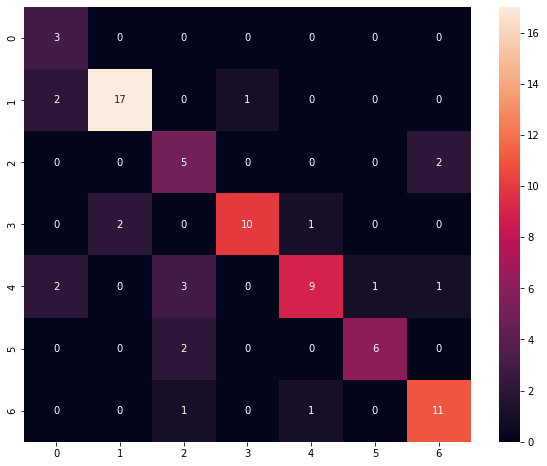

In [86]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(conf, annot=True)

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']